In [1]:
import numpy as np
import pandas as pd
import os
import string

In [2]:
dataset = pd.read_csv("Flavia_features.csv")

In [3]:
ds_path = "Leaves"
img_files = os.listdir(ds_path)

In [4]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [5]:
target_list = []
for file in img_files:
    
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [6]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [7]:
X = dataset.iloc[:,1:]

In [8]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197787.0,3479.036035,1416,759,1.865613,5.433846,61.195588,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,101297.0,2491.210239,1191,130,9.161538,1.528476,61.266656,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86626.5,2291.511754,1096,119,9.210084,1.505590,60.616856,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190481.0,2858.479352,1319,254,5.192913,1.758842,42.896164,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,228035.0,2920.420478,1325,286,4.632867,1.661806,37.401521,8.992028,16.671173,6.294281,30.967158,45.040198,28.595326,8.641438,0.998568,0.898644,1.968082


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 142)

In [11]:
from sklearn.preprocessing import StandardScaler
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV

In [14]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [15]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [16]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.066 (+/-0.009) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.235 (+/-0.030) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.641 (+/-0.041) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.837 (+/-0.012) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.855 (+/-0.018) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.862 (+/-0.027) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.238 (+/-0.033) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.648 (+/-0.047) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.845 (+/-0.010) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.893 (+/-0.019) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.895 (+/-0.017) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.879 (+/-0.018) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.646 (+/-0.050) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.838 (+/-0.022) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.900 (+/-0.024) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.905 (+/-0.024) for {'C': 100, 'gamma': 0.1, 'kernel':

In [17]:
svm_clf.best_params_

{'C': 100, 'kernel': 'linear'}

In [15]:
from sklearn.decomposition import PCA

pca = PCA()


pca.fit(X)


import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [17]:
import os
import cv2


In [18]:
def bg_sub():
    test_img_path = "1033.jpg"
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    ret_image, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [19]:
bg_rem_img = bg_sub()

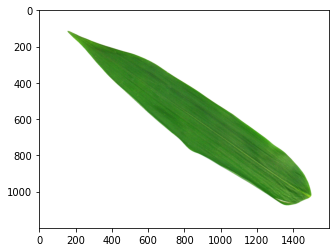

In [20]:
plt.imshow(bg_rem_img)

In [21]:

import mahotas as mt

def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    image, contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [22]:

features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,331492.0,3533.442242,1338,955,1.401047,3.854663,37.663697,10.683546,23.008007,6.865377,24.157551,50.309065,15.894268,26.285475,0.996259,0.85703,2.47879


In [23]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[-1.03170235 -0.26259497  0.09003149  0.32396563 -0.34165981  0.19614681
   0.08525207 -0.67915681 -0.84174468 -0.57220416 -1.35144832 -1.12004266
  -1.0891144  -0.04334027 -0.21422234  1.12424666 -1.22827556]]


0

In [24]:

common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'pubescent bamboo'